# Buying wins in NBA Basketball
##### by Nurul Zaman [noor]
![](images/title.png)

# Introduction
<hr>
NBA Basketball is big business in United States with most of the NBA teams worth in billions of dollars. The teams spend an enormous amount of money and effort in acquiring players from the colleges through the draft, signing them from other teams or from other countries. The owners are deep pocketed, some more than the others. Additionally, bigger markets such as Los Angeles or New York generate more revenue and have more to offer to attract the players. To keep some kind of check so that the richest owners and biggest markets do not monopolize the league, salary caps have been instituted. These caps make sure that organizations spending over the cap are heavily penalized financially. However, teams regularly go above the cap to get the top talent in the market. 

Money, therefore, plays an important role in keeping or acquiring the players. It is therefore logical to believe that all things being equal, more money spend on hiring the best players would ultimately result in greater wins. Or so I think. The goals of this project is to figure out the following:

<hr>
- Does total money spend on a team translates to more wins ?
- Does financial composition of the team play a role in more wins ? For example, is a team that pays top dollars for the top 3 stars win more games than the team paying top dollars for the top 2 stars ?
- Can we predict if the teams will qualify for playoffs based on money it spends on salaries ?
<hr>

To achieve these goals we will go through the following process:

-	**Regression analysis for team salaries vs. wins:** After collecting and cleaning up the data from online sources, we will aggregate and explore the data to check to see if there are obvious relationships. This will be primarily done by using scatter plots to see if a relationship exists. This will cover both the league wide analysis as well as conference based analysis. The league and conference notion is explained in a later section.  


-	**ANOVA for financial team composition vs. Wins:** Does a team win more if it adds more stars? Are 2 stars better than one? Does a strong (most paid) bench play any part in winning? We will compare the team wins with different team compositions in financial terms. For 1-star we will take the salary of the best paid player of each team and compare the wins. For 2-star We will next take the aggregated salaries of top 2 paid players and compare the wins and so on. We will use ANOVA to confirm if there are any differences to suggest if any specific team composition leads to more wins.


-	**Machine Learning Techniques for predicting playoffs:** NBA playoffs consist of the top 8 teams from each conference making the playoffs. This means that 16 teams land in the playoffs. In general, if teams win more than half their games, they land in playoffs. We will try to see if the amount of money spend on teams and players have any effect on predicting if the teams would end up in playoffs using the various machine learning techniques such as logistic regression and neural network. 



# Data Collection, Cleanup and Exploration
<hr>
### Data Collection
For the purpose of this project we need to collect the following data: 
- **Salary cap information: ** This is the salary cap for all the years. The salary cap is same for all teams. Teams that spend more money and go over the cap have to pay a huge financial penalty. This penalty gets steeper for repeat offenders. The salary cap data is a small set of data and and  is hardcoded as a dictionary.
<br><br>
- **Win loss record for all teams during the target period: ** The win loss records are also freely available from the web. We choose to only work with the wins. The basketball season is 82 games so we can always subtract the wins from the total to get the losses. In one shortened season, 2011, the teams only played 66 games. However, the wins for that season have been normalized to match the 82 games season.
<br><br>
- **Individual salary information for all players for all teams: ** This is the salary of each player in the league for all teams for targeted years. This is scraped from a basketball stats website and kept in a csv file. This took quite a lot of effort since this data is not easily available and I had to develop some python scripts for it. Once the data is downloaded, we keep it in identifiable files locally with the file names indicating the team and year. On all subsequent calls, this cache of files is first checked and data is loaded locally. If the file has not been donwloaded, it is downloaded and read. If something changes, we can always use the force otion to load the files again from the internet. 

<br>
The raw data described above is accessed from different part of the notebook as follows:
<br>
- **get_sals_df()** returns the individual salaries for players through the target years.
<br>
- **get_win_loss_df()** returns the win loss records for all teams for the target years
<br>
- **get_salary_cap_df()** returns the salary cap information for all years. 

The above methods have been encapsulated within the data_collection_summary() and a sample is reproduced below:


In [26]:
data_collection_summary()


===== League salary cap  -  17
   year       cap
0  2001  53777000
1  2002  57239000
2  2003  55792000

===== Detailed salary records  -  7728
              name      salary  year team_id
0  Dikembe Mutombo  14400000.0  2001     ATL
1   Alan Henderson   5910000.0  2001     ATL
2  Lorenzen Wright   4950000.0  2001     ATL

===== Win loss records  -  30
         2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  2011  \
team_id                                                                     
ATL        33    35    28    13    26    30    37    47    53    44    50   
BOS        49    44    36    45    33    24    66    62    50    56    48   
BRK        52    49    47    42    49    41    34    34    12    24    27   

         2012  2013  2014  2015  2016  
team_id                                
ATL        44    38    60    48    43  
BOS        41    25    40    48    53  
BRK        49    44    38    21    20  


### Data cleanup and aggregation
We now have the raw data that will be used for subsequent exploration. However, before doing that we would need to aggregate and normalize the data to be useful. 

- **Normalized 2011 win loss data:** 2011 was an exceptional year due to a shortened season becuase of a lockout. Instead of 82 games, each team played 66 games. The shortened year did not have any effect on player salaries so we just multiply the win totals for each time by 82/66 to arrive at a normalized total.


- **Normalized salary data:** In most explorations, we are considering the trends within a single year so the value of dollar does not play a role. However, when we start doing machine learning, we will use all the data for all years. To normalize the dollar value we will divide the salary for each player with the salary cap for that year. That will effectively normalize all salary data for all years. 


- **Aggregated team salary data:** For team wide exploration, we will just aggregate the data over salary information. This will get us 360 rows of data for total team salaries (30 team salaries multiplied by the number of years 12).  


- **Aggregated top stars salary data:** We also wanted to find out if the team composition had any effect on wins. We will aggregate the data and find out the salary of highest paid star, salaries of highest paid top 2 stars on a team, salaries of highest paid top 3 stars on a team and so on. For every year we will get a small data set of the top highest paid star and groups. (30 teams * 12 years * top 5).

Samples of these aggregations follow:

** Aggregated team salaries data **

In [27]:
get_agg_salary_df(get_sals_df()).iloc[-5:]

team_id,ATL,BOS,BRK,CHI,CHO,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,UTA,WAS
year,,,,,,,,,,,,,,,,,,,,,
2012,73669912.0,79820530.0,65281235.0,69548447.0,57902024.0,64875599.0,74463409.0,58553173.0,70923605.0,61576901.0,...,59501709.0,86962825.0,66672368.0,80640576.0,79568536.0,48950236.0,73732762.0,55063049.0,56948761.0,55386345.0
2013,66768365.0,73021989.0,84290205.0,75627699.0,57491899.0,68428583.0,67399169.0,68566062.0,63057497.0,69695346.0,...,67863244.0,87114818.0,84032270.0,60844774.0,73656857.0,54317436.0,69787704.0,66974563.0,64717649.0,66343388.0
2014,55131673.0,63769609.0,102608995.0,85095835.0,60819062.0,47050404.0,67486257.0,67324401.0,59157073.0,66764126.0,...,71181364.0,58318374.0,58945006.0,64412586.0,61539586.0,78765372.0,63666028.0,53076014.0,54491476.0,64064905.0
2015,58337671.0,61092622.0,91873492.0,81244225.0,75954458.0,82038768.0,83970065.0,56278056.0,66738182.0,73623654.0,...,78791632.0,53338463.0,56455990.0,66503432.0,92220907.0,73675912.0,69614583.0,75562364.0,59061387.0,83108421.0
2016,71453126.0,77202316.0,83831503.0,85385898.0,77609865.0,105962520.0,74040317.0,72606354.0,76638790.0,93707197.0,...,94622660.0,63349656.0,63646397.0,69701209.0,61000674.0,71840771.0,87365099.0,71934665.0,64783884.0,84237317.0


** Aggregated stars salaries data **

In [48]:
#tbd #summary_table_stars()[-5:]

# Analyzing wins against team salaries
<hr>
We will analyze the data to test our assumption that larger salaries paid to the teams will  result in more wins. The league itself is divided into two conferences: Eastern and Western. The teams play more games within the same coference and fewer games against teams in the other conference. Eight teams from each conference reach the playoffs. Because of this reason conferences are sometimes imbalanced. For example, currently Western conference is much stronger than its Eastern counterpart.  To compete against these stronger teams, the Western teams may spend more money and win less games than their Eastern counterparst. 

So, we will analyze the wins vs. team salaries considering the whole league as well as analyzing it within separate conferences. 

##### League team salaries vs. wins
The league wide comparison is for salary vs. wins for the 30 teams in NBA.  This comparison is repeated for all years between 2005 to 2016. The relationship is not very strong in most years. The smallest is 0.03 and the max is 0.5. In fact, in some years, we see a negative relationship showing that more money spent results in less wins !!

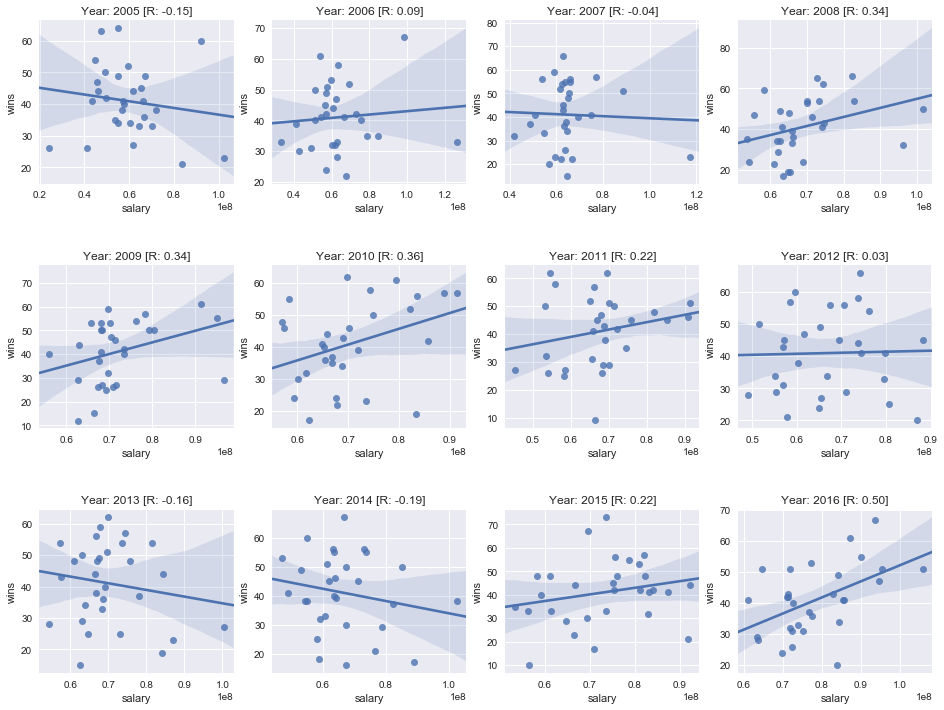

In [31]:
res = draw_regplots(get_team_ids())

##### Eastern Conference  team salaries vs. wins
The plots for Eastern Conference dont fare much better than the league average. In fact most of them are even worse than the league. It seems like that the Eastern conference spends a lot of money without any wins to show for it.

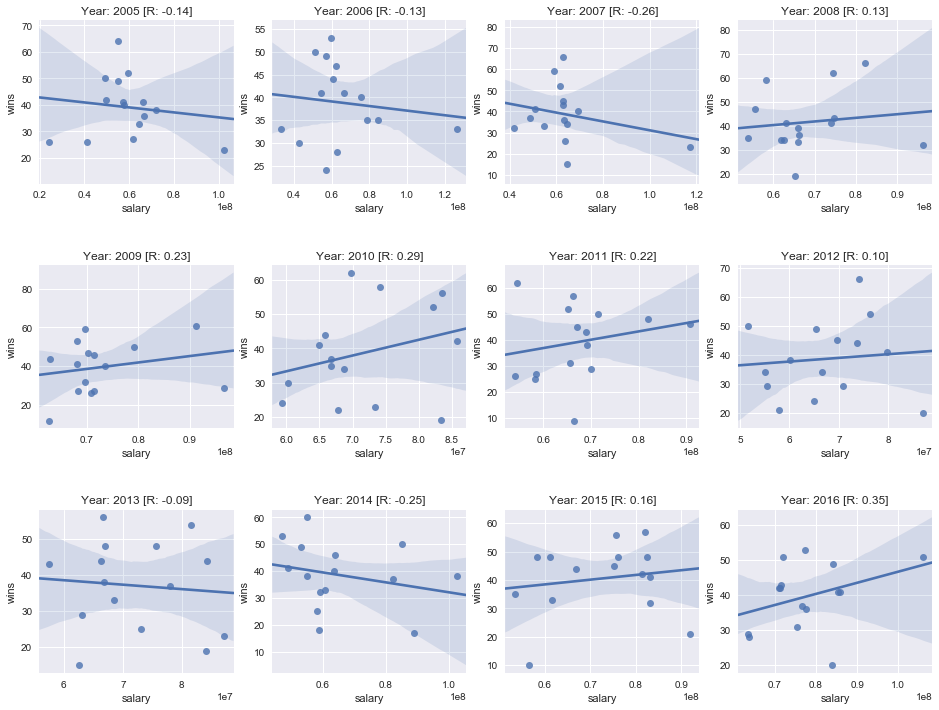

In [46]:
res = draw_regplots(get_team_ids_east())

##### Western Conference team salaries vs. wins
Western conference is slightly better than the Eastern with more wins to show for the money spend. However, the trend is still unclear.

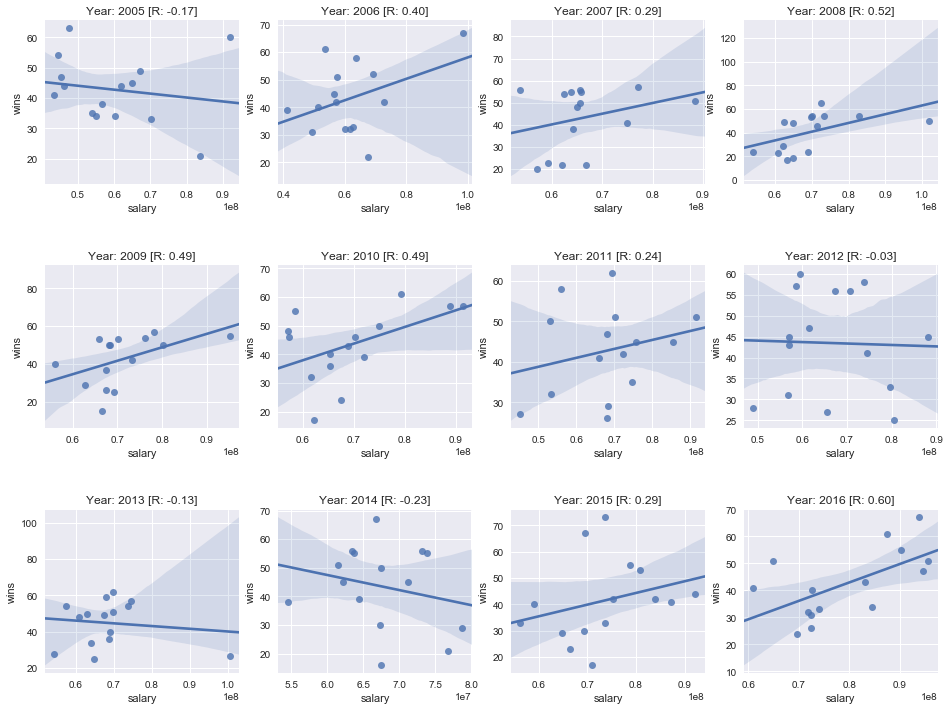

In [47]:
res = draw_regplots(get_team_ids_west())

### Summary  
The plots for the league as well as the conferences show that there is some kind of cyclic trend. The regression line sometimes follow an upward or downward trend across multiple years. It seems that every few years something happens that throws off the league in such a way that money spend does not result in wins. Over the next few years, this is corrected and teams spending more money start winning more - until the next downturn hits. We will come back to this phenomenon after a little bit more analysis and plausible explanations.

Following are summarized tables and plots that show this cyclical trend more clearly.

In [45]:
teamwork_summary_tables()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
League,-0.15,0.09,-0.04,0.34,0.34,0.36,0.22,0.03,-0.16,-0.19,0.22,0.50
East,-0.14,-0.13,-0.26,0.13,0.23,0.29,0.22,0.10,-0.09,-0.25,0.16,0.35
West,-0.17,0.40,0.29,0.52,0.49,0.49,0.24,-0.03,-0.13,-0.23,0.29,0.60


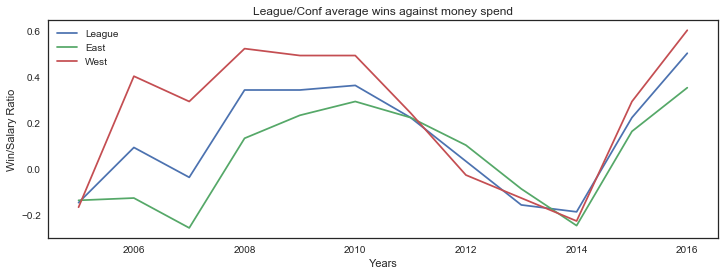

In [60]:
teamwork_summary_plots()

### Plausible explanations for the league and confernence wins vs. salary trends

After looking at the charts, we do not see any overarching relationships for money well spent. The relationship between money vs. wins swings from -0.25 to 0.50 and all values in between. However, over the longer term we do see some trends. Some of the most obvious trends may have the following plausible explanations: 


**2010 - 2014** 

At the beginning of 2010, the regression coefficient was at 0.5. From 2010-2014, it continuously went downward for both Eastern and Western conferences. This coincides with Lebron James joining the Heat to create a super team with Dwayne Wade and Chris Bosh. It seems that teams started reshaping theselves and threw money around to create their own super teams, to little effect. 


**Money Spend by the Two Conferences**

The wins vs. money swings are more obvious in the Western Conference. In the last couple of decades, East has consistently been the weaker conference. West had the prenniel super power San Antonio. To contend with San Antonio, teams like Lakers, Clippers, Rockets, Thunder, Grizzlies all have build powerful teams. Now with the rise of Heat, they again had to change their model with interim effects.



** 2014 - 2016 The Have and Have-Nots **

LeBron left the Heat in 2014 to go back to Cavaliers. By that time, the rest of the teams seem to have finally aligned themselves to counter the super team phenomena. The teams divided themselves into Have and Have Nots. The small market teams could not compete with the money spend so they chose the route of "Tanking" to speedily get to the bottom of the barrel. This allowed them for a high draft pick on rookie contracts.


# Analysis of wins against team super star composition
<hr>

Over the years, super start have ruled the NBA. In an effort to draw in the crowds and make the games entertaining, rules have been tweaked so that a super star can have an outsized effect on the game. We already discussed in the previous section that movement of one player, LeBron James, from one team to another shook up the whole league. Now we focus on the stars and see how they effect the game in terms of the wins compared to what they are paid.


Super stars are great players but they are ultimately humans. Teams can counter a single super star by crowding him or beating them by adding two stars on their own team. Similarly a team with 3 stars would be able to beat a team with 2 stars. Obviously, this is too simplistic and there are other dynamics that play into the equation. However, we will try to find if we can determine just by salaries if the composition of the team affects the wins.

** 1 star effect: ** We will take the top salary earner from each team and plot it against his win shares. This will be done for all 30 teams.

** 2 stars effect: ** We will take the top two combined salary from each team and plot it against the win shares.

and so on...

The following plots show the effect of top 1, 2, 3, and 4 top paid teams against the wins. In many cases, the team that pays the most to the top star also has the highest payroll for the top 2 stars. However, after breaking the bank for the top 1 or 2 stars and because of salary cap restrictions, little is left to pay the other players. Similarly, the money spent changes over the years for different teams. When nearer to the top, teams try to break the bank in the hope of a chamionship. Teams near the bottom try to spend lesser in the hope of getting a good pick in the lottery.

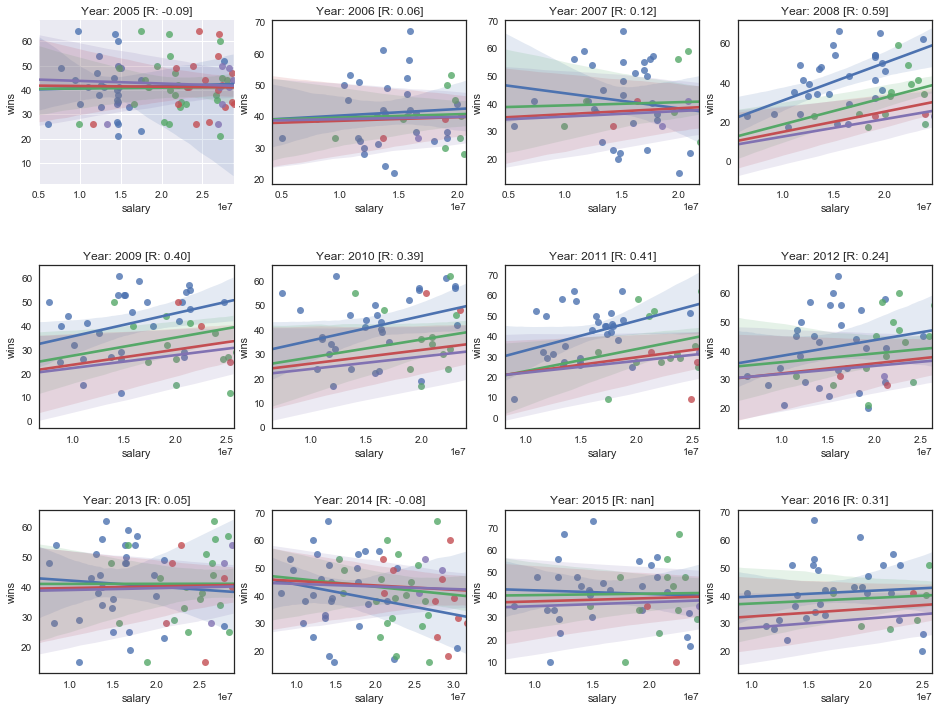

In [49]:
dfTops = get_stars_all(get_effective_years())
draw_stars_together(get_effective_years(), dfTops)

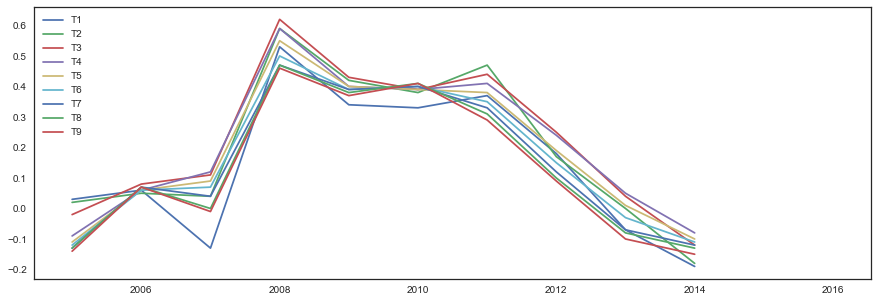

In [52]:
summary_plots_stars()

### Summary  
The yearly plots and summarized chart do show that ther are some differences between different team compositions. It may be possible that 3 highest paid stars is the optimum number to get the most wins. However, it is hard to tell that from the charts. We will use analysis of variance to find out if there is anything different between different team compositions and if so, which one. 


## ANOVA for team composition

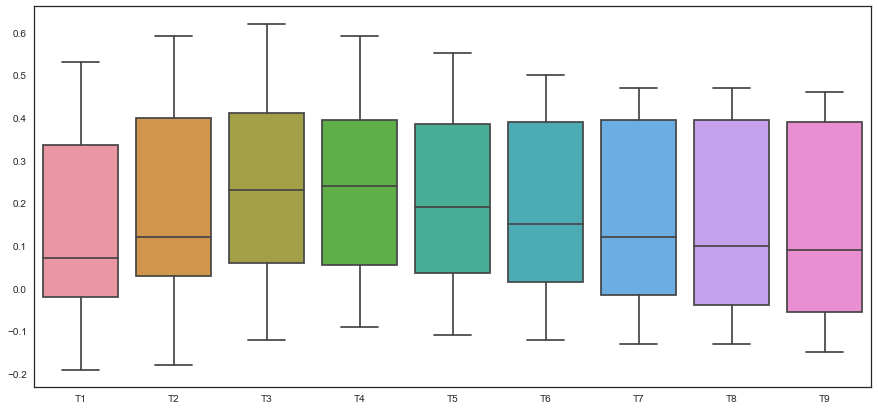

In [51]:
summary_boxplots_stars()

## TBD ANOVA analysis

# Machine Learning
![](images/let_the_machine_do_it.png)
Uptil now, we have explored the data at a higher level to see if we can see some obvious patterns in the data. There are some trends that we can see - for example it seems that number of wins start increasing for the total money spend on teams. However, we see that the trend keeps on going up and down over time. We will now move on to use some powerful  machine learning alogorithms that can figure out the hidden trends given enough data. We will try different techniques such as logistical regression, neural network, boosted tree and support vector machine to see if we can get some predictions about which team can make the playoffs. 

For machine learning we will operate on salary data for 11 players in each of the 30 teams over a period of 12 years. Normally there are 15 players in a team rotation. However, anyone beyond the second team gets a minimum amount of salary (relatively speaking) and it is hard to get these salaries from any online source. So in all we have

**12 years / 30 teams  / 11 players = 360 rows with 11 columns**

Our dataset now looks as follows:

In [56]:
create_prediction_df(normed = False).head() #real dollar values (for comparison)

,year,team_id,conf,playoffs,wins,salary_cap,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11
0,2005,ATL,Eastern,0,26,63318000,14625000.0,6325000.0,3250000.0,2700000.0,2550000.0,2490360.0,1800000.0,1500000.0,1300000.0,1270080.0,1100000.0
1,2005,BRK,Eastern,1,49,63318000,14989285.0,14796000.0,12584688.0,2266794.0,1887864.0,1600000.0,1053720.0,1000000.0,939480.0,932546.0,900000.0
2,2005,BOS,Eastern,0,33,63318000,12584688.0,9714538.0,5455200.0,5408700.0,5333333.0,4903000.0,4800000.0,4800000.0,2700000.0,1611840.0,1419240.0
3,2005,CHO,Eastern,1,26,63318000,6166466.0,3739680.0,1742400.0,1652453.0,1554326.0,1400000.0,1174200.0,1100000.0,932546.0,825000.0,695046.0
4,2005,CHI,Eastern,0,41,63318000,12925000.0,5408700.0,5055556.0,4801102.0,3896402.0,3358320.0,3150000.0,2750000.0,2525000.0,2349840.0,2273400.0


** Normalizing the data **

Before we submit the data to machine learning algorithms, we need to normalize the data so that the values across different teams and different time periods make sense. We use the "salary cap" as an equalizer. The cap is created for each year. Teams that go over the cap have to pay a steep penalty. 

- player salary percent = salary / salary_cap for that year

This provides us with a good measure for every salary. With the normalization, our dataset now looks like follows: 



Following is a breakdown of the fields submitted for prediction:
- year: year for the analysis
- team_id: a three digit identifier for each team
- conf: conference the team belongs to "Eastern" or "Western"
- playoffs: playoffs is the binary factor to indicate if a team made it to the playoffs or not.
- P1: top paid player on the team for that year
- P2: second top paid player for the team 
- P3 .. P11: thrid top paid player and so on..

In [53]:
create_prediction_df(normed = True).head() #normalized salaries across years

,year,team_id,conf,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,playoffs
0,2005,ATL,Eastern,0.230977,0.099893,0.051328,0.042642,0.040273,0.039331,0.028428,0.023690,0.020531,0.020059,0.017373,0
1,2005,BRK,Eastern,0.236730,0.233678,0.198754,0.035800,0.029816,0.025269,0.016642,0.015793,0.014837,0.014728,0.014214,1
2,2005,BOS,Eastern,0.198754,0.153425,0.086156,0.085421,0.084231,0.077435,0.075808,0.075808,0.042642,0.025456,0.022414,0
3,2005,CHO,Eastern,0.097389,0.059062,0.027518,0.026098,0.024548,0.022111,0.018544,0.017373,0.014728,0.013029,0.010977,1
4,2005,CHI,Eastern,0.204128,0.085421,0.079844,0.075825,0.061537,0.053039,0.049749,0.043432,0.039878,0.037112,0.035904,0


#### Summarizing the prediction data
Following table and plot shows the summary statistics about the data for running the classification preditions. The players on each team are listed as "P1", "P2".. in terms of decreasing salaries. The boxplots show that 

In [54]:
create_prediction_df(normed = True).describe().iloc[1:,3:]

,P3,P4,P5,P6,P7,P8,P9,P10,P11,playoffs
mean,0.130989,0.099881,0.077924,0.064059,0.052624,0.042221,0.033894,0.027921,0.022595,0.533333
std,0.045932,0.032168,0.023382,0.020643,0.018154,0.015543,0.013942,0.011612,0.009869,0.499582
min,0.027518,0.026098,0.021872,0.020052,0.016145,0.015137,0.010421,0.010421,0.007382,0.000000
25%,0.097522,0.078439,0.062551,0.050458,0.039720,0.030701,0.023897,0.019860,0.016002,0.000000
50%,0.123536,0.094454,0.075934,0.061334,0.050458,0.040942,0.031770,0.026116,0.020240,1.000000
75%,0.155236,0.116953,0.090673,0.076207,0.062180,0.049951,0.040507,0.033962,0.026730,1.000000
max,0.296889,0.216042,0.175385,0.137714,0.114654,0.110649,0.109966,0.107131,0.093224,1.000000


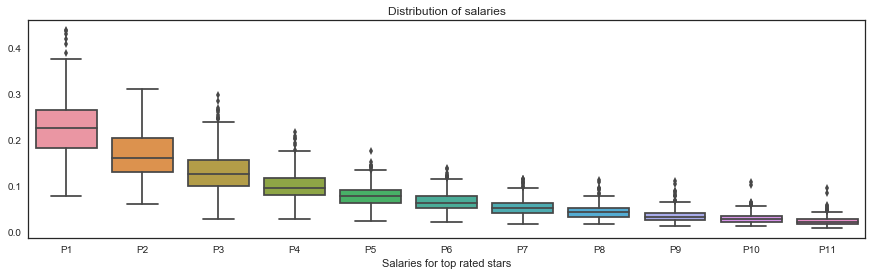

In [55]:
show_salary_distribution()

### Azure ML Experiments
We use Azure Machine Learning studio to conduct the classification experiments. The purpose of these experiments is to find out if the normalized player salaries can be used to predit if the team makes it to the playoffs. The experiments basically consist of:

- Loading data: Loading the supplied data in an Azure table format. This is simply done by loading the .csv file.
- Cleaning data: Changing column names, dropping columns. In this case, there was no need to do that.
- Splitting data: The splitting module splits the data into a defined percentage to be used for training and testing purposes. 
- Configuring algorithm: Azure provides drop down menus for configuration values. In most cases, we can just select the dafult. 
- Train model: This module uses the training data set to create the model. 
- Score model: This module uses the test data set to score the model previously created by the training module. 
- Evaluate model: Validates the model by presenting several statistics such as Accuracy, AUC and more to show how the model performed

We already have our prediction data cleaned up, normalized and ready for use. So it was easy to just write out the .csv file and then load it into Azure. We then ran the following experiments:

- **Logistic Regression Parameters:**

    - Create trainer mode: Single Parameter
    - Optimization tolerance: 1E-07
    - L1 regularization weight: 1
    - L2 regularization weight: 1
    - Memory size for L-BFGS: 20
    - Random number seed: 1234
    - Allow unknown categorical levels: Checked


- **Neural Network Parameters:** 

    - Create trainer mode: Parameter Range
    - Hidden layer specification: Fully-connected case
    - Number of hidden nodes: 100
    - Learning rate: 0.01, 0.02, 0.04
    - Use Range Builder: Unchecked
    - Number of iterations: 20, 40, 80, 160
    - Use Range Builder: Unchecked
    - The initial learning weights diameter: 0.01
    - The momentum: 0.01
    - The type of normalizer: Do not normalize
    - Shuffle examples: Checked
    - Random number seed: 1234
    - Allow unknown category: Checked


- **Boosted Tree Parameters:**

    - Create trainer mode: Parameter Range
    - Maximum number of leaves per tree: 2, 8, 32, 128
    - Use Range Builder: Unchecked 
    - Minimum number of samples per leaf node: 1, 10, 50
    - Use Range Builder: Unchecked 
    - Learning rate: 0.025, 0.05, 0.1, 0.2, 0.4
    - Use Range Builder: Unchecked 
    - Number of trees constructed: 20, 100, 500
    - Use Range Builder: Unchecked  
    - Random number seed: 1234


- **Support Vector Machine Parameters:**

    - Create trainer mode: Parameter Range
    - Number of iterations: 1, 10, 100
    - Use Range Builder: : Unchecked
    - Lambda: 0.00001, 0.0001, 0.001, 0.01, 0.1
    - Use Range Builder: : Unchecked
    - Normalize features: Unchecked
    - Project to the unit-sphere: Unchecked
    - Random number seed: 1234
    - Allow unknown categorical levels: Checked

#### Azure ML Run No. 1

![](images/experiments.png)

![](images/experiments_res1.png)

#### Machine Learning Summary
The results of all the machine learning techniques are not very encouraging. The accuracy of the best one is 0.576 which is as good as random guessing. This accuracy is across the board with all the techniques. Following is a table describing the feature weights assigned to various variables. Useless as it may seem, we can still glean some information from it:


|team ids    	|feature wt.  	|player |feature wt.  	|
|---	        |---	        |---	|---	        |
|team_id_ATL   	|0.677652   	|P1   	|-0.0165762     |
|team_id_BRK   	|-0.277229   	|P2    	|0.0114173      |
|team_id_CHI   	|0.653194   	|P4    	|-0.00952294   	|
|team_id_CHO   	|-0.0240512   	|P4    	|-0.0125567   	|
|team_id_DAL   	|0.53417   	    |P4    	|-0.0927288   	|
|team_id_DEN   	|0.201864   	|P5    	|-0.00866936   	|
|team_id_MIN   	|-1.24512   	|P8    	|0.297258   	|
|team_id_NYK   	|-0.0217422   	|P8    	|0.28889   	    |
|team_id_OKC   	|-0.288558   	|P10   	|-0.0115495     |
|team_id_PHI   	|-0.431389   	|P11   	|-0.0165952   	|
|team_id_SAS   	|0.934665   	|P11   	|-0.0116828   	|
|team_id_SAC   	|-0.712768   	|   	|   	        |
|team_id_TOR   	|-0.460099   	|   	|   	        |


- **8th highest paid player is the most important (!):** The feature weights go from a low of -0.017 for P1 to a high of +0.6 for P8. This is in effect telling us that a player who is being paied the 8th highest amount of money has more effect than the top paid player !! We can say that team rotations mostly consist of 8 players so a team with deep enough pockets to pay player number 8 higher than the competitors has a better chance of winning. 


- **Teams/Management play a role:** The model tries to put emphasis on team_ids. For example it assigns a weight of 0.93 to San Antonio Spurs (SAS). This is not surprising since SAS has been a model organization for decades since Greg Popovich took over as General Manager/Coach. But it also assigns a positive coefficient of 0.65 to Chicago Bulls which is not necessarily a well run organization. We can argue that a good team gets more bang for the buck and the model somehow figures out this hidden feature. The problem however is that organizations depend on personnel and assigning too much weight for a particular organization may not work if the organization changes. 



#### Azure ML Run No. 2 [After removing team ids]
For the second run we remove the team ids from the data set. Our rationale was that this would remove the team management bias and the prediction would totally depend upon the player salaries. The second run resulted in an even worse prediction classification across the board compared to the first run (which itself did not have stellar results).

![](images/experiments_res2.png)

# Conclusions and Recommendations
![](images/conclusions.png)
<hr>
### Assumptions and analysis
We started with the assumption that:
- The total money spent on a team results in more wins
- The composition of a team in terms of higly paid stars plays a role. For example, a team with 3 highest paid cumulative salaries win more games than a team with 2 highly paid stars.

The data does not necessarily support our first hypothesis. There seems to be some predictable but hard to analyze forces at play. We could see that the teams tend to start winning commensurate with their spendings but then something happens that shifts the balance of power in the teams. Some player gets injured, a super star changes team, a gifted rookie enters the league (rookies are paid far less). Any of these things or more creates a domino effect over the league

We then created fine grained dataset which consisted of individual player salary for each of the 30 teams for the 12 year period. We then subjected this data to a slew of machine learning techniques: logistic regression with various optimizations, Ada boosted analysis, neural network analysis, and .. None of the techniques were able to discover anything to create a useful model. 

### Rationalizing the result of analysis
As I have said repeatedly, NBA teams spend a ton of money on stars to make their team competitive. The owners are saavy business men (i dont know of any woman owner) and the general managers and scouts are seasoned professionals. Since "Moneyball" exploded on the scene, they have also employed a number of data analysts to use advanced metrics to create competitive teams. Why does it then seem that the teams seem to be throwing money around without any discernible results ? A closer look at the trends provide some clue to what may be happening. The NBA has an everchanging landscape with teams coming up with new formulae for success. I am reproducing a couple of charts below which show that over time we fan see a trend that more money thrown at players result in more wins. But as soon as the teams are able to figure out the ideal team composition some other team ups the ante and the mad dash begins again.

- In the 90s and early 2000s either one super star or a superstar/sidekick combo was the preferred mode of domination. Pairs such as Jordan/Pippen, Shaq/Kobe dominated the scene.

- In the mid 2000s things changed a little little more interesting with Celtics creating the Big Three with Garnett, Pierce and Ray Allen.

- The Big Three concept was taken to its height with Miami Heat able to recruit LeBron, Wade and Chris Bosh. Each of the player took a paycut and the team dominated NBA for the next 4 years. 

- Mid 2010s saw Golden State creating an even more potent team with 4 stars in the staring lineup with Curry, Durant, Thompson and Green. Golden State also featured another superstar in Andre Iguoudala who came off the bench to spark the second unit. Other teams are still adjusting to this new reality and adding pieces. 

- The other teams are now in a mad rush to compete with 3 stars becoming the new norm. OKC now has Russell, Anthony and Paul George.

Over time there have been exceptions such as Detroit Pistons and the continued excellence of San Antonio Spurs able to create teams with sustained teamwork. 

### Recommendations
Over the years, performance metrics such as PER (Player Efficiency Ratio) and Player Win Share have been developed that more accurately predict whether a team would make the playoffs. We hoped to do the same with the maoney being spend, but as our analysis have shown, larger salaries dont seem to play any direct part in wins. However, as I have indicated in the previous secion, that may have more to do with the changing landscape of NBA and for the teams to constantly re-invent themselves. There are some teams that are better at spending money for sustained excellence but they are exceptions rather than the norm. Teams history do play a part in wins. That mostly refers to the big markets, deep pocketed owners and good management but these nuances are hard to codify and will need more work. A more integrated module will be able to add the player performance stats with the salary info as well as the team management and coaching history to create an even better prediction model.

<hr>
# Scripts
<hr>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm

import urllib.request
from bs4 import BeautifulSoup 
    
import os
import time

%matplotlib inline

'''
Teams, their cities and conference association
'''
teams = { 
    'ATL': ('Atlanta', 'Hawks', 'Eastern'),
    'BRK': ('Brooklyn', 'Nets', 'Eastern'),
    'BOS': ('Boston', 'Celtics', 'Eastern'),
    'CHO': ('Charlotte', 'Hornets', 'Eastern'),
    'CHI': ('Chicago', 'Bulls', 'Eastern'),
    'CLE': ('Cleveland', 'Cavaliars', 'Eastern'),
    'DAL': ('Dallas', 'Mavericks', 'Western'),
    'DEN': ('Denver', 'Nuggets', 'Western'),
    'DET': ('Detroit', 'Pistons', 'Eastern'),
    'GSW': ('Oakland', 'Warriors', 'Western'),
    'HOU': ('Houston', 'Rockets', 'Western'),
    'IND': ('Indiana', 'Pacers', 'Eastern'),
    'LAC': ('Los Angeles', 'Clippers', 'Western'),
    'LAL': ('Los Angeles', 'Lakers', 'Western'),
    'MEM': ('Memphis', 'Grizzlies', 'Western'),
    'MIA': ('Miami', 'Heat', 'Eastern'),
    'MIL': ('Milwaukee', 'Bucks', 'Eastern'),
    'MIN': ('Minnesota', 'Timberwolves', 'Western'),
    'NOP': ('New Oreleans', 'Pelicans', 'Western'),
    'NYK': ('New York', 'Knicks', 'Eastern'),
    'OKC': ('Oklahoma City', 'Thunder', 'Western'),
    'ORL': ('Orlando', 'Magic', 'Eastern'),
    'PHI': ('Philadelphia', '76ers', 'Eastern'),
    'PHO': ('Phoenix', 'Suns', 'Western'),
    'POR': ('Portland', 'Trail Blazers', 'Western'),
    'SAC': ('Sacramento', 'Kings', 'Western'),
    'SAS': ('San Antonio', 'Spurs', 'Western'),
    'TOR': ('Toronto', 'Raptors', 'Eastern'),
    'UTA': ('Utah', 'Jazz', 'Western'),
    'WAS': ('Washington', 'Wizards', 'Eastern')
}

team_ids_pr = [
    'ATL','BRK', 'BOS', 'CHO', 'CHI', 'CLE', 'DAL', 'DEN', 
    'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 
    'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL',  'PHI', 'PHO', 
    'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']

team_ids_east_pr = [
    'ATL','BRK', 'BOS', 'CHO', 'CHI', 'CLE', 'DET', 'IND', 
    'MIA', 'MIL', 'NYK', 'ORL', 'PHI', 'TOR', 'WAS']

team_ids_west_pr = [
    'DAL', 'DEN', 'GSW', 'HOU', 'LAC', 'LAL', 'MEM', 'MIN', 
    'NOP', 'OKC', 'PHO', 'POR', 'SAC', 'SAS',  'UTA', ]

def get_team_ids():
    return list(team_ids_pr)
def get_team_ids_east():
    return list(team_ids_east_pr)
def get_team_ids_west():
    return list(team_ids_west_pr)
'''
Years for which we need the salary info
'''
team_sal_years = ['2001', '2002', '2003', '2004', '2005', '2006', 
             '2007', '2008', '2009', '2010', '2011', '2012', 
             '2013', '2014', '2015', '2016']

team_sal_years2 = ['2001', '2002', '2003', '2004', '2005', '2006', 
             '2007', '2008', '2009', '2010', '2011', '2012', 
             '2013', '2014', '2015', '2016', '2017', '2018']

def get_effective_years():
    years = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
    return years



'''
League wide salary cap for all the teams
'2000': (57684000),
'''
league_sal_cap = { 
    '2001': (53777000),
    '2002': (57239000),
    '2003': (55792000),
    '2004': (60889000),
    '2005': (63318000),
    '2006': (64455000),
    '2007': (65475000),
    '2008': (64612000),
    '2009': (63948000),
    '2010': (61991000),
    '2011': (60734000),
    '2012': (60512000),
    '2013': (63997000),
    '2014': (70951000),
    '2015': (94143000),
    '2016': (99093000),
    '2017': (101000000)
}
# league_sal_cap['2001']


'''
Get team salary by going to the correct URL that is already indexed by 
team name and year. The only problem is that some teams have changed 
cities and/or changed their names over time. So a lot of exceptional 
scenarios need to be handled to create the correct URL.
'''    
def gen_team_sal_urls():
    br_team_sal_page_url = "https://www.basketball-reference.com/teams/"
    team_urls = []
    orig_team_name = None
    for team in teams.keys():
        orig_team_name = team
        for year in team_sal_years:
            year = int(year)
            if team == 'MEM' and year == 2001:
                team = 'VAN'
            if team == 'VAN' and year != 2001:
                team = 'MEM'

            if team == 'OKC' and year in (2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008):
                team = 'SEA'
            if team == 'SEA' and year not in (2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008):
                team = 'OKC'

            #BRK
            if team == 'BRK' and year in range(2001,2013):
                team = 'NJN'
            if team == 'NJN' and year not in range(2001, 2013):
                team = 'BRK'

            #Charlotte - started in 2005 as hornets - changed to bobcats
            if team == 'CHO' and year in ([2001, 2002, 2003, 2004]):
                continue
            if team == 'CHO' and year in range(2005, 2015):
                team = 'CHA'  
            if team == 'CHA' and year not in range(2001,2015):
                team = 'CHO'  

            #New orleans - started in 2003 as hornets - then hornets okc - then pelicans
            if (team == 'NOP' or team == 'NOH') and year in ([2001,2002]):
                continue
            if (team == 'NOP' or team == 'NOH') and year in range(2006,2008):
                team = 'NOK'
            if (team == 'NOP' or team == 'NOK') and year in range(2008,2014):
                team = 'NOH'
            if (team == 'NOP' or team == 'NOK') and year in range(2001, 2006):
                team = 'NOH'
            if (team == 'NOH' or team == 'NOK') and year not in range(2001,2014):
                team = 'NOP'

            team_url = br_team_sal_page_url + team + "/" + str(year) + ".html"
            team_url_info = (team_url, orig_team_name, year)
            team_urls.append(team_url_info)
    return team_urls



'''
Filter the list of team urls and info to return only 
the ones for the paritcular years and teams
'''
def gen_team_sal_urls_for( teams=None, years=None ):
    
    urls = gen_team_sal_urls()
    if teams == None and years == None:
        return urls
    
    urls_teams = []
    if teams != None:
        for url in urls:
            for team in teams:
                if url[1] == team:
                    urls_teams.append(url)
                
    urls_years = []
    if years == None:
        return urls_teams
    else:        
        for url in urls_teams:
            for year in years:
                if str(url[2]) == str(year):
                    urls_years.append(url)
    return urls_years
    


def get_cached_sals():
    for team in teams.keys():
        for year in team_sal_years:
            print(year + "_" + team + "_sal.csv")

            
            
'''
Read from url or throw exception
'''
def get_page(url):
    import urllib.request
    
    page = None
    try:
        f = urllib.request.urlopen(url)
        page = f.read()
    except:
        print ("Error getting data from url")
    return page



'''
Download the salary table for every player for that particular 
year and a particular team passed in the arguments. This table 
is defined inside some javscript generated comments so it 
has to be scraped out using comment parsing. 

The table is stored as file prefixed with team name and year.
e.g. ATL_2018_salary.csv
'''
def download_sal_info(url, year, team):
    from bs4 import BeautifulSoup, Comment
    import pandas as pd
    import os
    
    csv = team + '_' + str(year) + '_salary.csv'
    page = get_page(url)
    soup = BeautifulSoup(page, "lxml")
    comments = soup.findAll(text=lambda text:isinstance(text, Comment))
    
    table = None
    for comment in comments:
        t = comment.extract()
        if 'table' in t and 'id="salaries2"' in t:
            table = BeautifulSoup(''.join(t), "lxml")
    headers = ['name', 'salary']
    rows = []
    for row in table.findAll('tr'):
        cols = row.findAll('td')
        col_idx = 0
        record = {}
        for col in cols:
            record[headers[col_idx]] = col.get_text()
            col_idx += 1
        rows.append(record)
    df = pd.DataFrame (rows)
    df = df.dropna(axis=0, how='any')
    df['year'] = year
    df['team'] = team
    return df



'''
If the file has already been donwloaded then get it from 
the cache and return othewise download and return it.
'''
def get_sal_info(url, year, team, loc='data/team_salaries', cached=True, delay=3):
    
    df = None
    csv = None
    
    if loc == None:
        csv = team + '_' + str(year) + '_salary.csv'
    else:
        csv = loc + '/' + team + '_' + str(year) + '_salary.csv'

    if os.path.exists(csv) and cached:
        df = pd.read_csv(csv)
    else:
        df = download_sal_info(url, year, team)
        df.to_csv(csv, encoding='utf-8', index=False)
        if delay > 0:
            time.sleep(delay)

    
    return df



'''
Returns all downloaded team salaries as a data frame
'''
def get_sals_df(loc='data/team_salaries', which_teams=None, which_years=None):
    
    csv = None
    df = pd.DataFrame()
    for team in teams.keys():
        for year in team_sal_years:
            csv = loc + '/' + team + '_' + str(year) + '_salary.csv'
            if os.path.exists(csv):
                if which_teams != None and team not in which_teams:
                    continue
                if which_years != None and year not in which_years:
                    continue 
                df_temp = pd.read_csv(csv)
                df_temp['salary'] = df_temp['salary'].str.replace(',', '')
                df_temp['salary'] = df_temp['salary'].str.replace('$', '')
                df_temp['salary'] = pd.to_numeric(df_temp['salary'], errors='coerce')
                df = pd.concat([df, df_temp], ignore_index=True)
                
    df.rename(columns = {'team':'team_id'}, inplace=True)
    return df


def get_agg_salary_df(arg_df):
    df = arg_df[['year', 'team_id', 'salary']]
    dfg = df.groupby(['year', 'team_id'])[['salary']].sum()
    dfg_unstacked = dfg.unstack()
    dfg_unstacked.reset_index(inplace=True)
    dfg_unstacked.set_index('year', inplace=True)
    return dfg_unstacked['salary']


def get_raw_win_loss_df():
    df = pd.read_csv('data/win_loss.csv')
    df.sort_values(by=['team_id'], inplace=True)
    return df



def get_win_loss_df():
    df = get_raw_win_loss_df().copy()
    df.set_index('team_id', inplace=True)
    del df['team_name']
    del df['conference']
    
    replace_val = int(np.round(np.mean(df.loc['CHO'][3:])))
    df.loc['CHO'].replace(-1, replace_val, inplace=True)
    
    return df

def get_conf_win_loss_df():
    df = get_raw_win_loss_df().copy()
    df_conf = df[['team_id', 'conference']]
    df_conf.set_index('team_id', inplace=True)
    return df_conf


def get_playoffs_df():
    df = pd.read_csv('data/playoffs.csv')
    df.sort_values(by=['team_id'], inplace=True)
    df.set_index('team_id', inplace=True)
    return df

def get_salary_cap_df():
    df = pd.DataFrame(list(league_sal_cap.items()), columns=['year', 'cap'])
    return df

/Users/nurulzaman/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [40]:

def draw_regplot(team_ids, year, axis, draw=True): 

    d1 = pd.DataFrame( get_agg_salary_df(get_sals_df())[team_ids].loc[year] )
    d2 = pd.DataFrame( get_win_loss_df().loc[team_ids][str(year)])

    d3 = pd.DataFrame(index=d1.index.values)
    d3['salary'] = d1.values
    d3['wins'] = d2.values
    corrf = "%0.2f"% (pearsonr(d1.values, d2.values)[0])

    if draw==True:
        sns.regplot('salary', 'wins', data=d3, ax=axis)
        corrs = 'R: ' + str(corrf)
        title = ('Year: ' + str(year) + ' [' + corrs + ']')
        axis.set_title(title)
        
    return corrf


def draw_regplots(team_ids, draw=True):
    corrs = []
    years = [2005, 2006, 2007, 2008, 2009, 2010, 2011,2012,2013,2014,2015, 2016]
    if draw==True:
        r_size, c_size = 16, 4
        cols = c_size
        rows = len(years)/cols 
        fig = plt.figure(figsize=(r_size,rows*c_size))
        plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
        fig.clf()

    for i, year in enumerate(years):
        ax = None
        if draw==True:
            ax = fig.add_subplot(rows, cols, i + 1)
        corr = draw_regplot(team_ids, year, ax, draw) 
        corrs.append(corr)
    return corrs


def get_teamwork_corrs():

    corrs_all = pd.DataFrame(index=range(2005,2017)) # show a few
    res_all = draw_regplots(get_team_ids(), draw=False)
    corrs_all['League'] = res_all
    
    res_east = draw_regplots(get_team_ids_east(), draw=False)
    corrs_all['East'] = res_east
    
    res_west = draw_regplots(get_team_ids_west(), draw=False)
    corrs_all['West'] = res_west
    
    return corrs_all


In [59]:
def data_collection_summary():
    print ("\n===== League salary cap  - ", len(get_salary_cap_df()))
    print (get_salary_cap_df().head(3))

    print ("\n===== Detailed salary records  - ", len(get_sals_df()))
    print(get_sals_df().head(3))

    print ("\n===== Win loss records  - ", len(get_win_loss_df()))
    print (get_win_loss_df().head(3))



def teamwork_summary_tables():
    #cols = ['League', 'East', 'West']
    #corrs_all[cols] = corrs_all[cols].apply(pd.to_numeric, errors='coerce', axis=1)
    corrs_all = get_teamwork_corrs()
    return corrs_all.T
    
    
def teamwork_summary_plots():

    fig = plt.figure(figsize=(12,4))
    ax = plt.subplot(1,1,1)
    fig.clf()
    plt.xlabel('Years')
    plt.ylabel('Win/Salary Ratio')
    plt.title('League/Conf average wins against money spend')

    corrs_all = get_teamwork_corrs()
    plt.plot(corrs_all.League, label='League')
    plt.plot(corrs_all.East, label='East')
    plt.plot(corrs_all.West, label='West')
    plt.legend()

    plt.show()

In [21]:
'''
This module takes care of calculating the contribution 
of the stars on the wins. The stars themselves are calculated 
as having the top salaries. So 
T1 (top star 1) means the top salary for the top star
T2 means cumulative salary of top 2 stars
'''

'''
'''
def draw_stars_together(years, dfTops):
    cols = 4
    rows = len(years)/cols 
    fig = plt.figure(figsize=(16,rows*4))
    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    fig.clf()

    for i, year in enumerate(years):
        for t in ['T1', 'T2', 'T3', 'T4']:
            ax = fig.add_subplot(rows, cols, i + 1)
            corrf = draw_stars(dfTops[t][i], year, ax, 1)
            
            
def draw_stars_separate(years, dfTops):
    cols = 4
    rows = len(years) * cols 
    fig = plt.figure(figsize=(16, rows*4))
    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    #fig.clf()

    j = 0
    for i, year in enumerate(years):
        for k, t in enumerate(['T1', 'T2', 'T3', 'T4']):
            j += 1
            ax = fig.add_subplot(rows, cols, j)
            #print ('dfTops[t][j]', t, i)
            corrf = draw_stars(dfTops[t][i], year, ax, k + 1)
            
            
def draw_stars(df, year, axis, style): 
    #print ('style: ', style)
    if style == 1:
        sns.set_style("white")
    elif style == 2:
        sns.set_style("darkgrid")
    elif style == 3:
        sns.set_style("whitegrid")
    else:
        sns.set_style("dark")

    sns.regplot('salary', 'wins', data=df, ax=axis)
    corrf = "%0.2f"% (pearsonr(df['salary'].values, df['wins'].values)[0])
    corrs = 'R: ' + str(corrf)
    title = ('Year: ' + str(year) + ' [' + corrs + ']')
    axis.set_title(title)
    return corrf 
    
    
def get_stars_all(years, first_four=True):
    wins_df = get_win_loss_df().copy()
    sals_df = get_sals_df().copy()
    
    df_tops_dict = {}
    
    df_tops_dict['T1']= get_stars(1, years, wins_df, sals_df)
    df_tops_dict['T2']= get_stars(2, years, wins_df, sals_df)
    df_tops_dict['T3']= get_stars(3, years, wins_df, sals_df)
    df_tops_dict['T4']= get_stars(4, years, wins_df, sals_df)
    if first_four == False:
        df_tops_dict['T5']= get_stars(5, years, wins_df, sals_df)
        df_tops_dict['T6']= get_stars(6, years, wins_df, sals_df)
        df_tops_dict['T7']= get_stars(7, years, wins_df, sals_df)
        df_tops_dict['T8']= get_stars(8, years, wins_df, sals_df)
        df_tops_dict['T9']= get_stars(9, years, wins_df, sals_df)
        df_tops_dict['T10']= get_stars(10, years, wins_df, sals_df)
        df_tops_dict['T11']= get_stars(11, years, wins_df, sals_df)

    return df_tops_dict


'''
nlargest is the number of stars on the team.
    - if nlargest = 1, return the salary of the top star
    - if nlargest = 2, return the combined salary of top 2 stars
    and so on
'''
def get_stars(nlargest, years, wins_df, sals_df):
    df_tops = []
    for i, year in enumerate(years):
        
        wins = wins_df[str(year)]

        df = sals_df
        dfg = df[df['year'] == year].groupby('team_id')

        tops = []
        keys = []
        for key, gr in dfg:
            keys.append(key)
            
            if nlargest == 11:
                tops.append( sum (sorted(gr.salary)[-11:]) )
                
            elif nlargest == 10:
                tops.append( sum (sorted(gr.salary)[-10:]) )
                
            elif nlargest == 9:
                tops.append( sum (sorted(gr.salary)[-9:]) )
                
            elif nlargest == 8:
                tops.append( sum (sorted(gr.salary)[-8:]) )
                
            elif nlargest == 7:
                tops.append( sum (sorted(gr.salary)[-7:]) )
                
            elif nlargest == 6:
                tops.append( sum (sorted(gr.salary)[-6:]) )
                
            elif nlargest == 5:
                tops.append( sum (sorted(gr.salary)[-5:]) )
                
            elif nlargest == 4:
                tops.append( sum (sorted(gr.salary)[-4:]) )
                
            elif nlargest == 3:
                tops.append( sum (sorted(gr.salary)[-3:]) )
                
            elif nlargest == 2:
                tops.append( sum (sorted(gr.salary)[-2:]) )
                
            else:
                tops.append( sum (sorted(gr.salary)[-1:]) )

        df_top = pd.DataFrame({'salary': tops, 'wins': wins}, index=keys)
        df_tops.append(df_top)
    return df_tops


def get_star_corrs():
    dfTops = get_stars_all(get_effective_years(),first_four=False)
    df = pd.DataFrame(dfTops, index = get_effective_years())
    corrf_all = {}
    tops = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
    for year in get_effective_years():
        corrf_year = {}
        for top in tops:
            df_Tops = df[top].loc[year]
            corrf = "%0.2f"% (pearsonr(df_Tops['salary'].values, df_Tops['wins'].values)[0])
            corrf_year[top] = corrf
        corrf_all[year] = corrf_year
    return corrf_all


def summary_plots_stars():
    corrs_all = pd.DataFrame(get_star_corrs()).T
    fig = plt.figure(figsize=(15,5))
    ax = plt.subplot(1,1,1)
    fig.clf()
    ax.set_xlabel('Years')
    ax.set_ylabel('Wins')
    ax.set_title('League/Conf average wins against money spend')
    
    plt.plot(corrs_all.T1, label='T1')
    plt.plot(corrs_all.T2, label='T2')
    plt.plot(corrs_all.T3, label='T3')
    plt.plot(corrs_all.T4, label='T4')
    plt.plot(corrs_all.T5, label='T5')
    plt.plot(corrs_all.T6, label='T6')
    plt.plot(corrs_all.T7, label='T7')
    plt.plot(corrs_all.T8, label='T8')
    plt.plot(corrs_all.T9, label='T9')
    plt.legend()

    plt.show()

    
def summary_boxplots_stars():
    dft = pd.DataFrame(get_star_corrs()).T
    fig = plt.figure(figsize=(15, 7))
    sns.boxplot(data=dft)
    plt.show
    
    
def summary_table_stars():
    return pd.DataFrame(get_star_corrs()).T

In [22]:
## PART 3 - create big dataset and predict
def create_prediction_df(normed=True, wins=False):
    
    vals_all = []
    df_sals = get_sals_df()
    df_wins = get_win_loss_df()
    df_conf = get_conf_win_loss_df()
    df_playoffs = get_playoffs_df()
    dfc = get_salary_cap_df()
    
    cols = ['year', 'team_id', 'conf', 'playoffs', 'wins', 'salary_cap', 
        'P1','P2','P3','P4','P5','P6','P7','P8','P9','P10', 'P11']
    
    for i in get_effective_years():
        dfy = df_sals[df_sals['year'] == i]
        
        for team in get_team_ids():
            df = dfy[dfy['team_id'] == team]
            df = df.sort_values('salary', ascending=False)
            df = df[:11] #only the top 10
                        
            vals = [] 
            vals.append(df['year'].iloc[0])
            vals.append(df['team_id'].iloc[0])
            vals.append(df_conf.loc[team].values[0]) #conf
            vals.append(df_playoffs[[str(i)]].loc[team].values[0]) #playoffs
                        
            vals.append(df_wins[str(i)][team])
            vals.append(dfc[dfc.year == str(i)]['cap'].values[0])  

            for j in np.arange(0,11):
                vals.append(df['salary'].iloc[j])

            df['year'].iloc[0]
            df['team_id'].iloc[0]
            df['salary'].iloc[1]

            vals_all.append(vals)
    df_all = pd.DataFrame(data = vals_all, columns=cols)
 
    if normed == True:
        df_normed = df_all[['P1','P2','P3','P4','P5','P6','P7','P8', 'P9',
                            'P10','P11']].div(df_all.salary_cap, axis = 0)
        if wins == True:
            df_header = df_all[['year', 'team_id', 'conf', 'wins']]
        else:
            df_header = df_all[['year', 'team_id', 'conf']] #, 'wins'
        df_trailer = df_all[['playoffs']]
        df_all = pd.concat([df_header, df_normed, df_trailer], axis='columns')
        
    return df_all

def show_salary_distribution():
    df = create_prediction_df(normed=True)
    df_p= df[['P1','P2','P3','P4', 'P5','P6','P7','P8', 'P9', 'P10', 'P11']]
    fig = plt.figure(figsize=(15, 4))
    sns.boxplot(data=df_p)
    plt.title('Distribution of salaries')
    plt.xlabel('Salaries for top rated stars')
    plt.show